<a href="https://colab.research.google.com/github/kh-ops69/Data_science/blob/master/lego_sales_and_item_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO
sets tend to have more or fewer parts than newer sets?</li>
</ul>

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

In [ ]:
df = pd.read_csv('Data/colors.csv')
df

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f


In [ ]:
df.nunique(axis=0, dropna=True)

id          135
name        135
rgb         124
is_trans      2
dtype: int64

In [ ]:
trans_no = 0
opaque_no = 0
for i in range(0, df.shape[0]):
  if 'Trans' in df['name'][i]:
    trans_no += 1
  else:
    opaque_no += 1
print(trans_no, opaque_no)

28 107


In [ ]:
df.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [ ]:
df.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

<h3><hr><b>Understanding LEGO Themes vs. LEGO Sets</b></h3>
<img src='https://i.imgur.com/aKcwkSx.png'><hr style='line-width:25px;'>
<p>Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.</p>
<img src='https://i.imgur.com/whB1olq.png'>

In [ ]:
sets = pd.read_csv('Data/sets.csv')
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [ ]:
sets.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [ ]:
sets[sets['year']==1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [ ]:
sets.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [ ]:
sets.groupby('name').count().sort_values('year', ascending=False)

,set_num,year,theme_id,num_parts
name,,,,
Basic Building Set,56,56,56,56
Universal Building Set,34,34,34,34
Basic Set,30,30,30,30
Helicopter,28,28,28,28
Fire Station,20,20,20,20
...,...,...,...,...
Friends Advent Calendar 2017,1,1,1,1
Friends Advent Calendar 2018,1,1,1,1
Friends Advent Calendar 2019,1,1,1,1


In [ ]:
graph_set = sets.groupby('year').count().sort_values('year', ascending=False)['num_parts']
graph_set
#sets.groupby('year').count().sort_values('year', ascending=False)['num_parts'].idxmin()

In [ ]:
sets_by_year = sets.groupby('year').count()
sets_by_setno = sets.groupby('set_num').count()
# sets_by_year['set_num'].head()
# sets_by_setno.head()
sets_by_year['set_num'].head()
# sets_by_year.sort_values('num_parts', ascending=False)

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

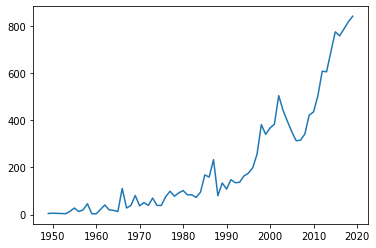

In [ ]:
plt.plot(sets_by_year.index[:-2], sets_by_year.num_parts[:-2])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [ ]:
themes_per_year = sets.groupby('year').agg({'theme_id':pd.Series.nunique})
themes_per_year.rename(columns={'theme_id':'unique_theme_agg'}, inplace=True)
themes_per_year.head()

,unique_theme_agg
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [ ]:
themes_per_year.idxmax()

unique_theme_agg    2015
dtype: int64

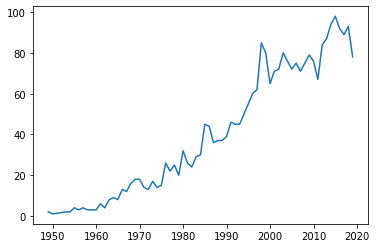

In [ ]:
plt.plot(themes_per_year.index[:-2], themes_per_year.unique_theme_agg[:-2])

### Line Charts with Two Seperate Axes

Text(0, 0.5, 'number of parts used')

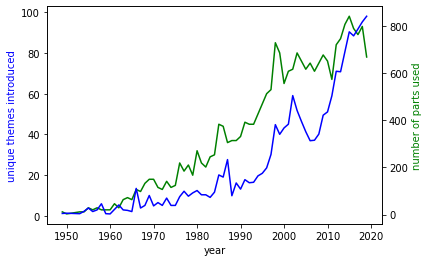

In [ ]:
ax1 = plt.gca()
#get current axis
ax2 = ax1.twinx()
ax1.plot(themes_per_year.index[:-2], themes_per_year.unique_theme_agg[:-2], color='g')
ax2.plot(sets_by_year.index[:-2], sets_by_year.num_parts[:-2], 'b')
ax1.set_xlabel('year')
ax1.set_ylabel('unique themes introduced', color='b')
ax2.set_ylabel('number of parts used', color='g')

In [ ]:
parts_per_year = sets.groupby('year').agg({'num_parts':pd.Series.mean})
parts_per_year.rename(columns={'num_parts': 'average_parts_no'}, inplace=True)
parts_per_year.tail()

,average_parts_no
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


In [ ]:
parts_per_year.head()

,average_parts_no
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


### Scatter Plots in Matplotlib

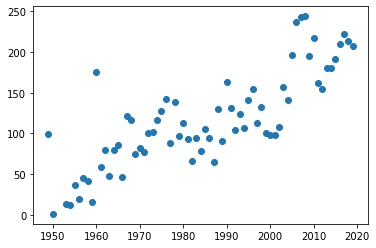

In [ ]:
plt.scatter(parts_per_year.index[:-2], parts_per_year['average_parts_no'][:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets?

In [ ]:
sets['theme_id'].value_counts()

158    753
501    656
494    398
435    356
503    329
      ... 
307      1
215      1
361      1
210      1
414      1
Name: theme_id, Length: 571, dtype: int64

Displaying the database schema: https://i.imgur.com/Sg4lcjx.png

<img src="https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

In [ ]:
themes = pd.read_csv('Data/themes.csv')
foriegn_id = themes[themes['name']=='Star Wars'].id
for id in foriegn_id:
  records = sets[sets['theme_id']==id]
  print(records)

       set_num                                name  year  theme_id  num_parts
8786   65081-1  R2-D2 / C-3PO Droid Collectors Set  2002        18          1
12051   8000-1                           Pit Droid  2000        18        223
12058   8001-1                        Battle Droid  2000        18        336
12066   8002-1                     Destroyer Droid  2000        18        567
12071   8007-1                               C-3PO  2001        18        339
12072   8008-1                        Stormtrooper  2001        18        360
12073   8009-1                               R2-D2  2002        18        239
12074   8010-1                         Darth Vader  2002        18        388
12081   8011-1                          Jango Fett  2002        18        425
12083   8012-1                  Super Battle Droid  2002        18        378
15273  K8008-1      Darth Vader / Stormtrooper Kit  2002        18          0
           set_num                                              

In [ ]:
set_theme_count = sets["theme_id"].value_counts()
set_theme_count[:5]
set_theme_count = pd.DataFrame({'id': set_theme_count.index,'set_count': set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [ ]:
merged_df = pd.merge(themes, set_theme_count, on='id')
updated_merged_df = merged_df.sort_values('set_count', ascending=False)
updated_merged_df

,id,name,parent_id,set_count
134,158,Star Wars,NaN,753
384,501,Gear,NaN,656
379,494,Friends,NaN,398
336,435,Ninjago,NaN,356
386,503,Key Chain,501.0,329
...,...,...,...,...
161,212,Classic Basic,207.0,1
159,210,Belville,207.0,1
149,200,My Own Creation,186.0,1
391,509,Adventurers,507.0,1


<BarContainer object of 5 artists>

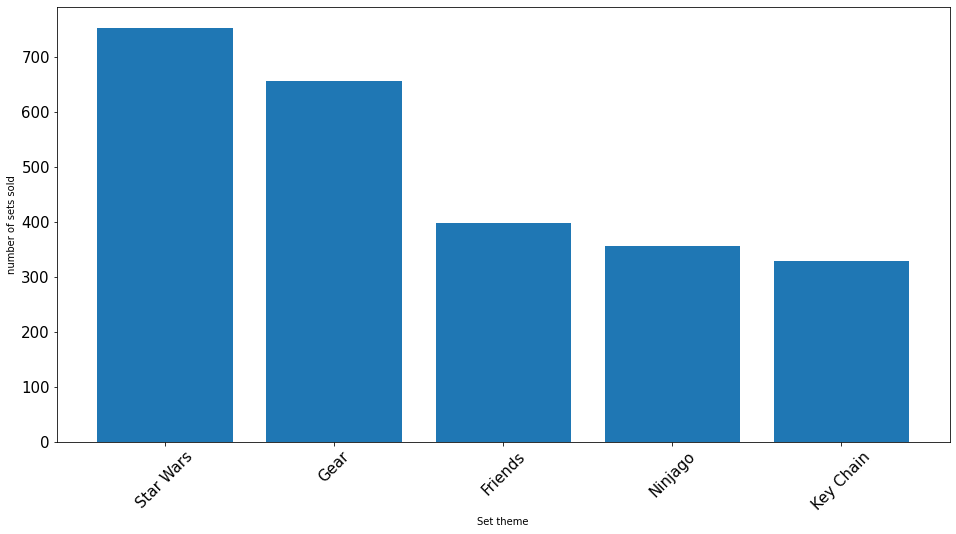

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('Set theme', fontsize=10)
plt.ylabel('number of sets sold', fontsize=10)
plt.bar (updated_merged_df.name[:5], updated_merged_df.set_count[:5])